# Aspiration d'images avec `selenium`

<div class="alert alert-block alert-info">
<bObjectif p:</b>Ce notebook permet de découvrir les commandes de base pour aspirer des images avec r <code>selenium</code>. Les ⌛ indiquent qu'il peut être nécessaire d'attendre un peu avant d'obtenir le résultat escompté. 
.</div>

## Import des modules

(Ré)importons les modules nécessaires :

In [1]:
import selenium.webdriver # les pilotes des navigateurs
from selenium.webdriver.common.by import By # les modes de recherche des éléments

## Lancement du navigateur piloté par `selenium`

Lancez Chrome piloté par `selenium` avec : 

In [2]:
options = selenium.webdriver.ChromeOptions()
driver = selenium.webdriver.Chrome(options=options)  

🛟 Pour la suite, affichez à l'écran **en parallèle** l'instance de Chrome ouverte et ce notebook.

## Téléchargement d'images

🔜 Nous allons exploiter de nouveau le site Web de l'IUT1 avec l'objectif de télécharger les images d'illustration de chaque actu du site (image immédiatement sous le titre dans la page d'une actu). 

### Identification d'une image

❓Avec un navigateur, récupérez manuellement l'URL de la page consacrée à la 1ère actu du site Web de l'IUT et (après avoir mis à jour le code suivant) placez votre navigateur _dedans_ :

In [4]:
# ici le code
url = "https://iut1.univ-grenoble-alpes.fr/iut1/"
driver.get(url)

⚠️ Débarassez vous manuellement de la _pop-up_ sur les cookies.

❓Ciblez l'image de l'actualité actuellement affichée par votre navigateur par son XPath pour récupérer son URL :

In [5]:
image = driver.find_element(By.XPATH, '//*[@id="contenu_sans_nav_sans_encadres"]/div/div/div[3]/div/div[2]/div[1]/div/ul/li[1]/div[1]/a/img')
url_image = image.get_attribute("src")
print(url_image)

https://iut1.univ-grenoble-alpes.fr/medias/photo/iut1-calendrier-candidatures-but-2024-_1700036307287-jpg


### Edition de l'image avec `selenium`

Tentez d'y accèder directement avec `selenium` ; testez et observez le résultat de :

In [6]:
driver.get(url_image)

⚠️ Resterait à simuler un _clic droit_ → Enregistrez sous... Mais ces actions ne relèvent pas du navigateur mais du système d'exploitation (hors contexte pour cette ressource). Il n'est donc pas possible de la télécharger en utilisant `selenium`.  

<div class="alert alert-warning"> L'une des raisons du "problème" est que - comme beaucoup de navigateurs - Chrome dispose de <i>plugins</i> pour éditer (en plus des pages Web) différents types de fichiers (images, pdf, ...). </div>

### Téléchargement avec `requests`

Une première solution consiste à utiliser le module `requests` (solution déjà vue dans le TP précédent).

⚠️ Adaptez en code suivant en fonction du format de l'image (`png` ou `jpg`) puis testez :

In [7]:
import requests
contenu = requests.get(url_image).content # le contenu binaire de l'image

with open("image.jpg", "wb") as fid: # Ouverture du fichier image.jpg en écriture
    fid.write(contenu) # Ecriture du contenu binaire de l'image dans le fichier

L'image téléchargée peut être affichée directement depuis le fichier téléchargé pour vérifier que le téléchargement et l'enregistrement s'est correctement effectué :

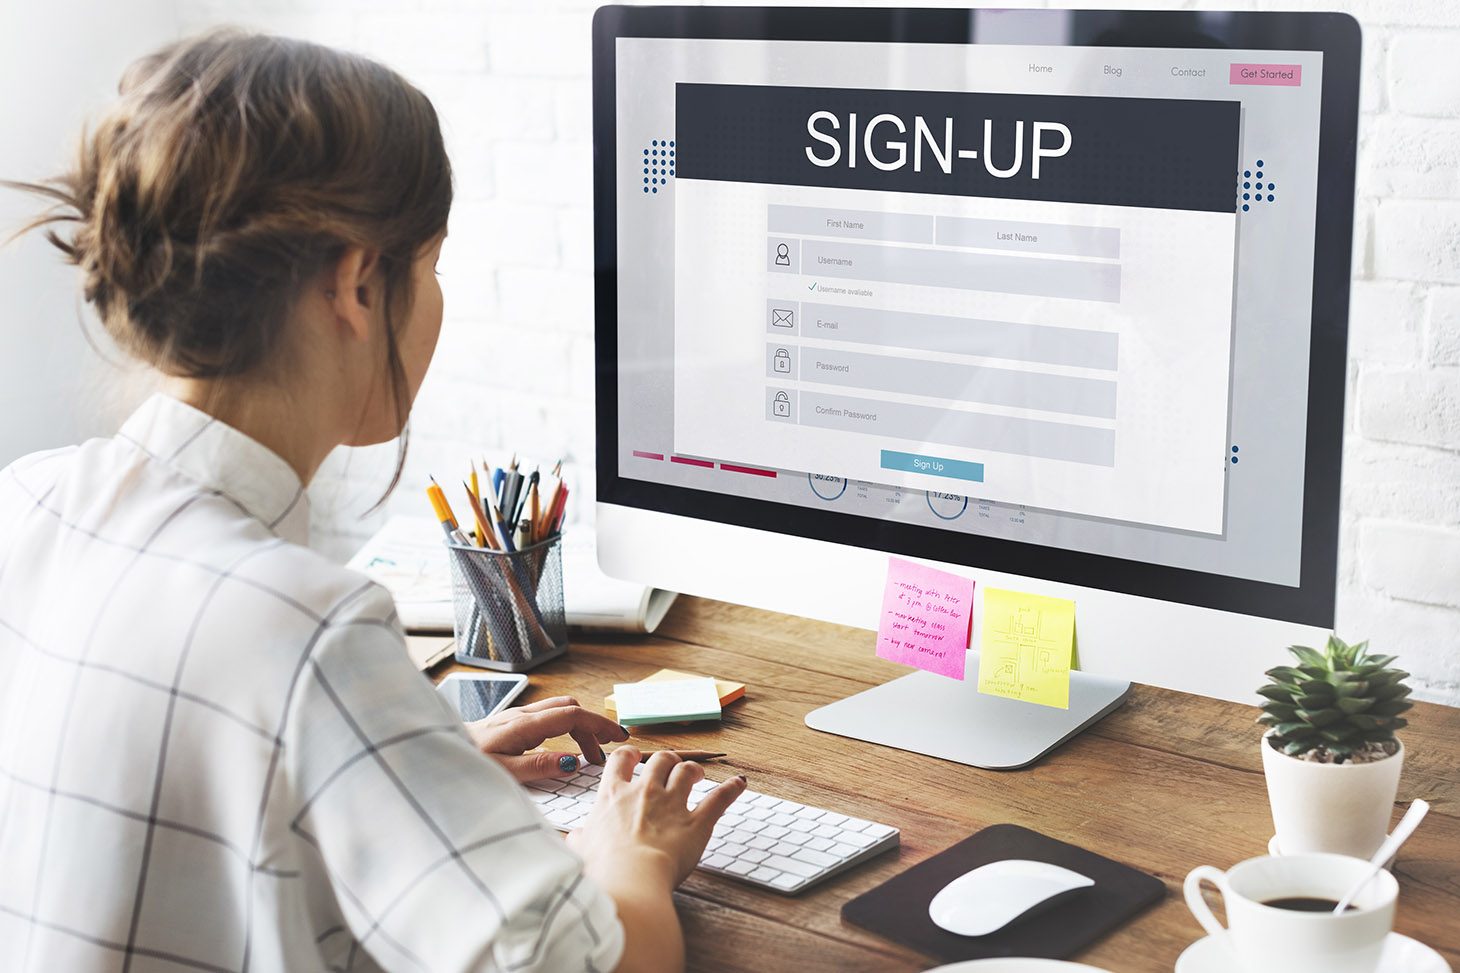

In [8]:
import PIL.Image
import io
import IPython.display 
# Visualisation
image = PIL.Image.open("image.jpg")
IPython.display.display(image)


### Téléchargement avec `urllib`

Autre solution plus rapide, avec `urllib` :

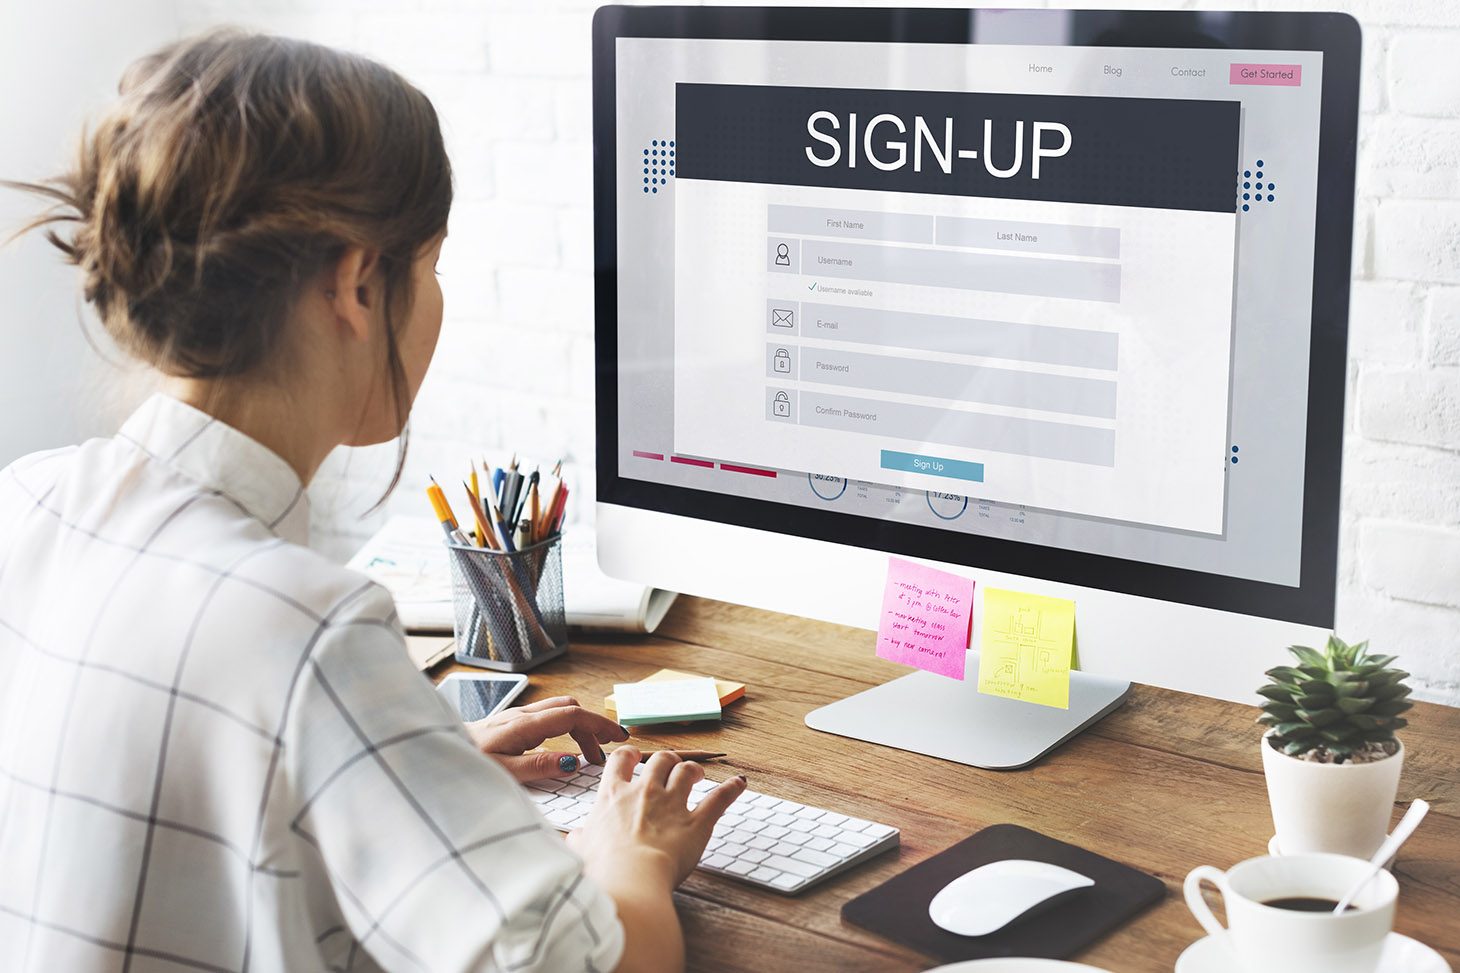

In [12]:
import urllib
urllib.request.urlretrieve(url_image, "image_bis.jpg")

# Visualisation
IPython.display.display(PIL.Image.open("image_bis.jpg"))

### Gestion du nom d'image avec `url_parser`

Le nom de l'image peut être déduit directement de son URL avec le module `url_parser` :

In [10]:
import url_parser, pprint
details_url = url_parser.get_url(url_image)
pprint.pprint(details_url)

nom_image = details_url.file + ".jpg"
print(nom_image)

UrlObject(protocol='https', www=None, sub_domain='iut1', domain='univ-grenoble-alpes', top_domain='fr', path='/medias/photo/iut1-calendrier-candidatures-but-2024-_1700036307287-jpg', dir='/medias/photo/', file='iut1-calendrier-candidatures-but-2024-_1700036307287-jpg', fragment=None, query=None)
iut1-calendrier-candidatures-but-2024-_1700036307287-jpg.jpg


Fermez votre _driver_ :

In [11]:
driver.quit()